##  Prepared by -- Uday Prakash Jaiswal
### Task-1 GRIP Supervised Machine Learning 
#### Predicting Percentage Score of a Student Based on Hours Dedicated towards Study

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#loading the dataset from the url
url = "http://bit.ly/w-data"
MarksData = pd.read_csv(url)
print("Data Import Complete")
print("Showing the first few rows of Data")

MarksData.head(10)

Data Import Complete
Showing the first few rows of Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#lets check the shape and other details of the data
print("The shape of the dataset is", MarksData.shape)


The shape of the dataset is (25, 2)


In [4]:
#describing the data and information about it 
print(MarksData.info())
MarksData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Dropping the Duplicate values if any
print("The shape of the dataset before dropping duplicates", MarksData.shape)
MarksData=MarksData.drop_duplicates()
print("The shape of the dataset before dropping duplicates", MarksData.shape)


The shape of the dataset before dropping duplicates (25, 2)
The shape of the dataset before dropping duplicates (25, 2)


**thus no dupliactes are present** 

## Since there is just two variable -1 Dependent(Scores) and 1Independent(Hours);
### We can plot it in a 2D plot to check for the relationship 

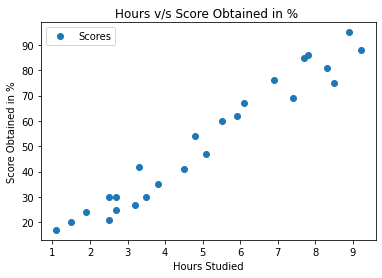

In [6]:
MarksData.plot(x='Hours',y='Scores',style='o')
plt.title("Hours v/s Score Obtained in % ")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained in %")
plt.show()

**we can see a clear positive trend and a relation of hours with the target variable** 


***checking the correlation value with the Target variable***

In [7]:
MarksData.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**97.61% correlation with our target variable**

## Checking for missing values in our dataset 


In [8]:
MarksData.isna().sum()

Hours     0
Scores    0
dtype: int64

**no missing value in our dataset **

## Data Preparation for our Machine Learning Model

In [9]:
Predictor=['Hours']
X=MarksData[Predictor].values
y=MarksData['Scores'].values


**spliting the data for training and testing with the help of sklearn library with 80% training data**


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("size of training data",X_train.shape)
print("size of training data",X_test.shape)

size of training data (20, 1)
size of training data (5, 1)


## Training our model


In [11]:
from sklearn.linear_model import LinearRegression
LREG=LinearRegression()
model_reg=LREG.fit(X_train,y_train)
print("we have trained our model ")



we have trained our model 


## MODEL SPECIFICATION 


In [12]:
print("model Specification--")
print("Coeff of Hour ",model_reg.coef_)
print("intercept value ",model_reg.intercept_)
print("EQUATION OF OUR MODEL---- No_of_hours *",model_reg.coef_,'+',model_reg.intercept_)

from sklearn import metrics
print("The value of R squared is",metrics.r2_score(y_train,model_reg.predict(X_train)))

model Specification--
Coeff of Hour  [9.91065648]
intercept value  2.018160041434683
EQUATION OF OUR MODEL---- No_of_hours * [9.91065648] + 2.018160041434683
The value of R squared is 0.9515510725211552


## ploting the regression line

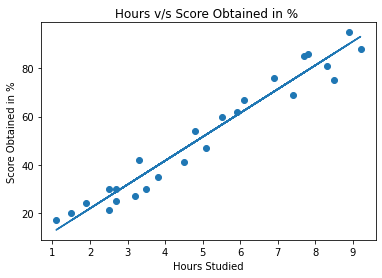

In [13]:
# Plotting the regression line
line = model_reg.coef_*X+model_reg.intercept_

plt.title("Hours v/s Score Obtained in % ")
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained in %")

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

## Predicting the test Data

In [14]:
print("the test data is")
print(X_test)
predcitions=model_reg.predict(X_test)


the test data is
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
TestResult=pd.DataFrame(data=X_test,columns=['Hours'])
TestResult['actual']=y_test
TestResult['prediction']=predcitions
TestResult['Percentage_error']=100*(TestResult['actual']-TestResult['prediction'])/TestResult['actual']
TestResult.head()

,Hours,actual,prediction,Percentage_error
0,1.5,20,16.884145,15.579276
1,3.2,27,33.732261,-24.934299
2,7.4,69,75.357018,-9.213070
3,2.5,30,26.794801,10.683996
4,5.9,62,60.491033,2.433817


In [16]:
# making prediction for our custom data 
hour=[[9.25]]
custom_pred=model_reg.predict(hour)
print("No of hours--",hour)
print("Score in % =", custom_pred[0])

No of hours-- [[9.25]]
Score in % = 93.69173248737538


## Model Evaluation  

In [17]:
MAPE=(abs(TestResult['Percentage_error']))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predcitions)) 
print("MEAN ABSOLUTE PERCENTAGE ERROR ",np.mean(MAPE))
print("MEAN ABSOLUTE PERCENTAGE Accuracy ",100-np.mean(MAPE))
print("MEDIAN ABSOLUTE PERCENTAGE Accuracy ",100-np.median(MAPE))

Mean Absolute Error: 4.183859899002975
MEAN ABSOLUTE PERCENTAGE ERROR  12.568891617045663
MEAN ABSOLUTE PERCENTAGE Accuracy  87.43110838295433
MEDIAN ABSOLUTE PERCENTAGE Accuracy  89.31600414346758
